In [104]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import scipy.stats as stats
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from osgeo import gdal
import xarray as xr
from scipy.io import loadmat
from matplotlib.ticker import PercentFormatter
from matplotlib import rcParams
rcParams['patch.force_edgecolor'] = True   # show edgecolor

# Read Data

In [113]:
results = loadmat('Data/barmah_full_5thres_results.mat',simplify_cells=True)
yr = results['yr']
xr = results['xr']
zr = results['zr']

In [114]:
h22 = results['height_22'].flatten()
l22 = results['length_22'].flatten()
maxA22 = results['maxleeangle_22'].flatten()
h23 = results['height_23'].flatten()
l23 = results['length_23'].flatten()
maxA23 = results['maxleeangle_23'].flatten()

maxlength = 85
minA = 1

ID = l22 < maxlength
l22 = l22[ID]
h22 = h22[ID]
maxA22 = maxA22[ID]
ID = maxA22 > minA
l22 = l22[ID]
h22 = h22[ID]
maxA22 = maxA22[ID]
ID = h22 > 0.05
l22 = l22[ID]
h22 = h22[ID]
maxA22 = maxA22[ID]

ID2 = l23 < maxlength
l23 = l23[ID2]
h23 = h23[ID2]
maxA23 = maxA23[ID2]
ID2 = maxA23 > minA
l23 = l23[ID2]
h23 = h23[ID2]
maxA23 = maxA23[ID2]
ID2 = h23 > 0.05
l23 = l23[ID2]
h23 = h23[ID2]
maxA23 = maxA23[ID2]

# Plots


/var/folders/qp/730rtpld0y3cvn9lscp9l7mh0000gn/T/ipykernel_11895/327344949.py:22: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar(label='Elevation (m)', aspect=30, ticks=elevationticks, orientation='horizontal', pad=0.03)


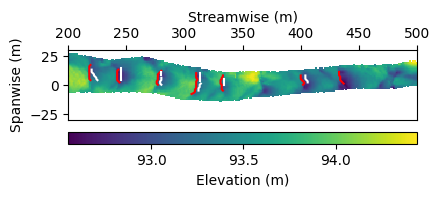

In [115]:
draft = True
plt.figure(figsize=(4.5,4.5))
start = 200
length = 300
m2km = lambda x, _: f'{x/1000:g}'
y = yr[start:start+length,0]
z = zr[start:start+length]
elevationticks = [92.5, 93, 93.5, 94]
plt.pcolor(y,xr[0],z.T)
for i in range(len(results['MC']['CL']['PixelIdxList'])):
    plt.plot(yr.T.flatten()[results['MC']['CL']['PixelIdxList'][i]],
             xr.T.flatten()[results['MC']['CL']['PixelIdxList'][i]],c='r')

for i in range(len(results['MC']['TL']['PixelIdxList'])):
    plt.plot(yr.T.flatten()[results['MC']['TL']['PixelIdxList'][i]],
             xr.T.flatten()[results['MC']['TL']['PixelIdxList'][i]],c='w')
plt.axis('square')
plt.ylim(-30,30)
plt.xlim(start,start+length)
plt.ylabel('Spanwise (m)')
plt.xlabel('Streamwise (m)')
plt.colorbar(label='Elevation (m)', aspect=30, ticks=elevationticks, orientation='horizontal', pad=0.03)
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.set_ticks_position('top')
#plt.gca().yaxis.set_major_formatter(m2km)
plt.tight_layout()

if draft==False:
    plt.savefig('cl_results_python.png',dpi=300)

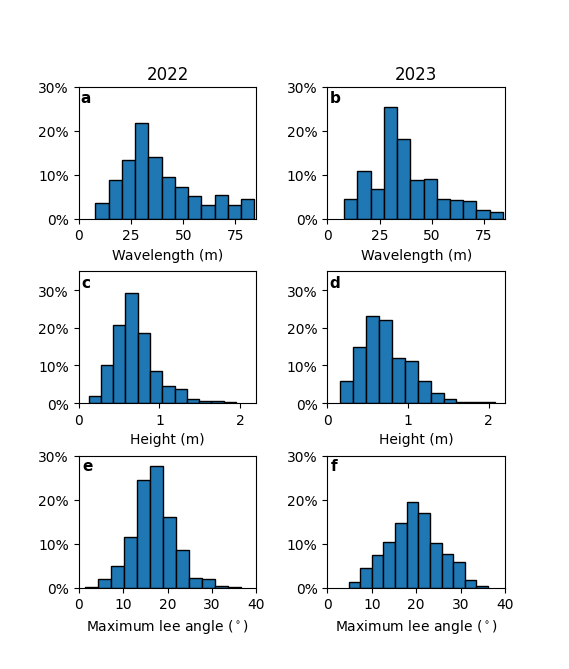

In [118]:
draft = False
fig =plt.gcf()
ax00 = fig.add_axes([0,0,1,1])
ax00.patch.set_alpha(0)
ax00.set_zorder(1)

if draft: #if draft is true
    plt.xticks([]) 
    plt.yticks([])
else:
    plt.axis('off') 

ax1 = plt.subplot(3,2,1)
plt.title('2022',fontsize=12)
plt.hist(l22, weights=np.ones(len(l22)) / len(l22), bins = 12)
plt.xlabel('Wavelength (m)')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1, decimals=0))
plt.ylim(0,0.3)
plt.xlim(0,85)

ax2 = plt.subplot(3,2,2)
plt.title('2023',fontsize=12)
plt.hist(l23, weights=np.ones(len(l23)) / len(l23), bins = 12)
plt.xlabel('Wavelength (m)')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1, decimals=0))
plt.ylim(0,0.3)
plt.xlim(0,85)

ax3 = plt.subplot(3,2,3)
plt.hist(h22, weights=np.ones(len(h22)) / len(h22), bins = 12)
plt.xlabel('Height (m)')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1, decimals=0))
plt.ylim(0,0.35)
plt.xlim(0,2.2)

ax4 = plt.subplot(3,2,4)
plt.hist(h23, weights=np.ones(len(h23)) / len(h23), bins = 12)
plt.xlabel('Height (m)')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1, decimals=0))
plt.ylim(0,0.35)
plt.xlim(0,2.2)

ax5 = plt.subplot(3,2,5)
plt.hist(maxA22, weights=np.ones(len(maxA22)) / len(maxA22), bins = 12)
plt.xlabel('Maximum lee angle ($^\\circ$)')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1, decimals=0))
plt.ylim(0,0.3)
plt.xlim(0,40)

ax6 = plt.subplot(3,2,6)
plt.hist(maxA23, weights=np.ones(len(maxA23)) / len(maxA23), bins = 12)
plt.xlabel('Maximum lee angle ($^\\circ$)')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1, decimals=0))
plt.ylim(0,0.3)
plt.xlim(0,40)

plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.4)
fig.set_size_inches(5.5, 6.5)

# making a,b,c figure labels
ax1.text(1, 0.26,'a',fontsize=11, weight='bold', horizontalalignment='left', verticalalignment='bottom')
ax2.text(1, 0.26, 'b',fontsize=11, weight='bold', horizontalalignment='left', verticalalignment='bottom')
ax3.text(0.03, 0.3,'c',fontsize=11, weight='bold', horizontalalignment='left', verticalalignment='bottom')
ax4.text(0.03, 0.3, 'd',fontsize=11, weight='bold', horizontalalignment='left', verticalalignment='bottom')
ax5.text(0.8, 0.26,'e',fontsize=11, weight='bold', horizontalalignment='left', verticalalignment='bottom')
ax6.text(0.8, 0.26, 'f',fontsize=11, weight='bold', horizontalalignment='left', verticalalignment='bottom')


if draft==False:
    plt.savefig('barmah_hist_python.png',dpi=300)